## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

#### Контрольный вопрос: что такое порядок точности метода?

Ваш ответ: Порядок точности метода p - наибольшая степень полинома, для которого численный метод дает точное решение задачи, $\varepsilon_h =Ch^p$.


Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

#### Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

Ваш ответ: Порядок метода будет $N-1$ т.к. при разложении максимальная степень - $N-1$ (разложение начинается с нулевой).

В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

#### Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

Ваш ответ: Данная матрица называется матрицей Вандермонда $\rightarrow$ система всегда имеет единственное решение ($detA \neq 0$).

In [1]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)

    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса
diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.4999823898925212


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
2. написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

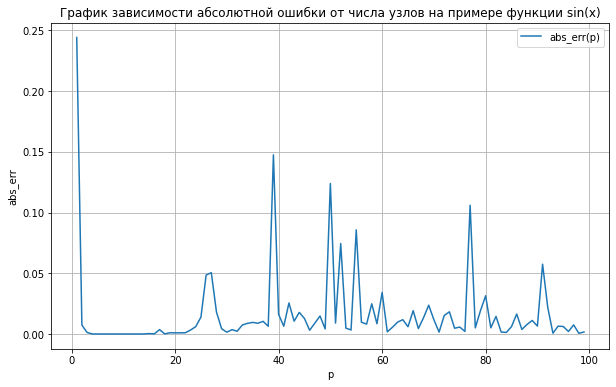

In [9]:
# Скрипт, который строит график зависимости абсолютной ошибки от числа узлов
import matplotlib.pyplot as plt
abs_er = []
p_array = np.arange(1, 100)
for i in p_array: 
  u_ = np.sin(np.linspace(a,b,i+1)) 
  abs_er.append(np.abs(np.cos(x[0]) -  get_diff(u_, 0, i, (b-a)/i)))

plt.figure(figsize=(10,6))
plt.plot(p_array,abs_er)
plt.title('График зависимости абсолютной ошибки от числа узлов на примере функции sin(x)')
plt.legend(['abs_err(p)'])
plt.grid()
plt.xlabel('p')
plt.ylabel('abs_err')
plt.show()


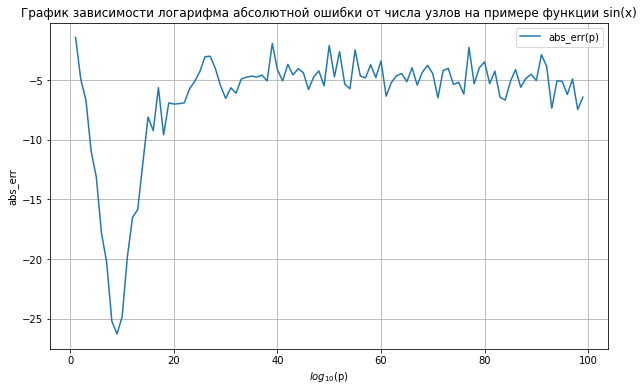

In [10]:
plt.figure(figsize=(10,6))
plt.plot(p_array,np.log(abs_er))
plt.title('График зависимости логарифма абсолютной ошибки от числа узлов на примере функции sin(x)')
plt.legend(['abs_err(p)'])
plt.grid()
plt.xlabel('$log_{10}$(p)')
plt.ylabel('abs_err')
plt.show()

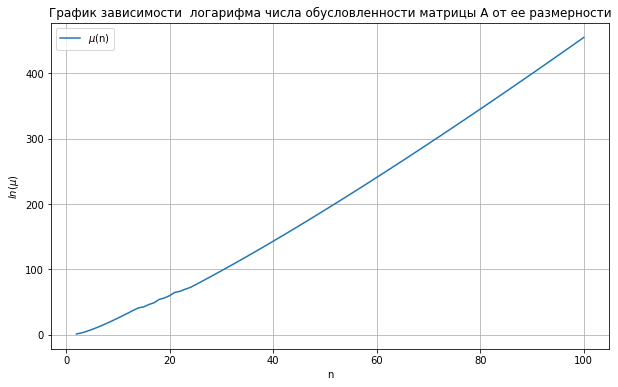

In [4]:
# Cкрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности


p_array = range(1, 100)
x_l =[]
y = []
for i in p_array:  
  x1 = np.linspace(a, b, i+1)
  x_l.append(x1.size)
  u = np.sin(x1)
  n= u.size
  v = np.linspace(0,i, n)
  A = np.fliplr(np.vander(v, v.size)).T
  y.append(np.linalg.cond(A))

plt.figure(figsize=(10,6))
plt.plot(x_l,np.log(y))
plt.title('График зависимости  логарифма числа обусловленности матрицы А от ее размерности')
plt.legend(['$\mu$(n)'])
plt.grid()
plt.xlabel('n')
plt.ylabel('$ln(\mu)$')
plt.show()



## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков.

Данные графики ведут себя как константы, отклонение от такого поведения с левого конца связано с ошибкой округления, а справа со слишком большим значением шага сетки. Сам же график показывает, что  при изменении шага сетки отношение ошибок метода при $h$ и $h/2$ сохраняется.

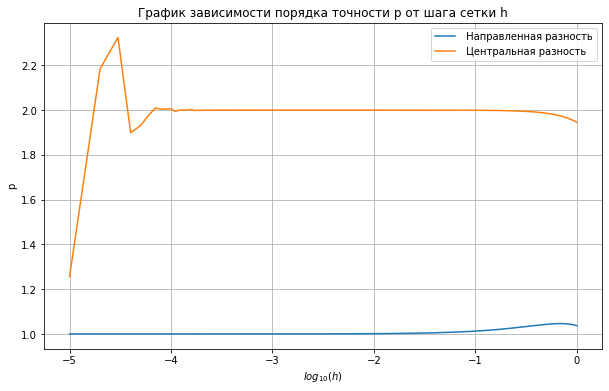

In [8]:
%matplotlib inline 
h1 = np.arange(10**(-5), 1, 10**(-5))
h2 = h1/2
  
erh11 = np.abs(np.cos(x[0]) - (np.sin(x[0]+h1)- np.sin(x[0]))/h1)
erh12 = np.abs(np.cos(x[0]) - (np.sin(x[0]+h2)- np.sin(x[0]))/h2)
erh21 = np.abs(np.cos(x[0]) - (np.sin(x[0]+h1)- np.sin(x[0]-h1))/2/h1)
erh22 =np.abs(np.cos(x[0]) - (np.sin(x[0]+h2)- np.sin(x[0]-h2))/2/h2)
p1 = np.log2(erh11/erh12)
p2 = np.log2(erh21/erh22)

plt.figure(figsize=(10,6))
plt.plot(np.log10(h1),p1, label = ' Направленная разность')
plt.plot(np.log10(h1),p2, label = ' Центральная разность')
plt.title('График зависимости порядка точности p от шага сетки h')
plt.grid()
plt.legend()
plt.xlabel('$log_{10}(h)$')
plt.ylabel('p')
plt.show()


## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Но не стоит с помощью него реализовывать какие-либо численные методы. Рассмотрим пример его использования для дифференцирования:

In [76]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html
import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000